# Solving ODE numerically and analytically

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as pltzz

In [52]:
gamma, g = 0.1, 10
x0, y0 = 0, 0
v0 = 3

angels = np.array([1/6, 1/4, 1/3]) * np.pi
plot_times = [0.3, 0.42, 0.51]

def dvdt(t,S):
    x, y, vx, vy = S
    return [vx, vy, -gamma* vx, -gamma * vy - g]

def analytical_solution(t, vx0, vy0): 
    x = (vx0/gamma) * (1 - np.exp(-gamma*t)) 
    y = ((vy0 + g/gamma)/gamma) * (1 - np.exp(-gamma*t)) - (g/gamma)*t 
    return x, y

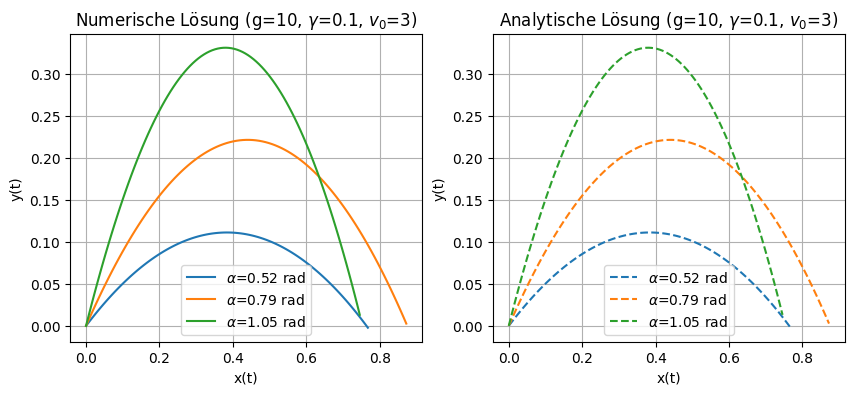

In [53]:

fig, axs = plt.subplots(1,2, figsize=(10,4))

for i,alpha in enumerate(angels):
    t = np.linspace(0,plot_times[i],100)
    v0x = v0*np.cos(alpha) 
    v0y = v0*np.sin(alpha)
    S0 = (x0, y0, v0x, v0y)

    sol_num = solve_ivp(dvdt,t_span=(0,max(t)),y0=S0,t_eval=t) 
    x_ana, y_ana = analytical_solution(t, v0x, v0y)

    x_num = sol_num.y[0]
    y_num = sol_num.y[1]

    axs[0].plot(x_num, y_num, '-', label=fr"$\alpha$={alpha:.2f} rad") 
    axs[1].plot(x_ana, y_ana, '--', label=fr"$\alpha$={alpha:.2f} rad") 

axs[0].set_xlabel("x(t)") 
axs[0].set_ylabel("y(t)") 
axs[0].set_title(fr"Numerische Lösung (g={g}, $\gamma$={gamma}, $v_0$={v0})") 
axs[0].grid(True) 
axs[0].legend() 

axs[1].set_xlabel("x(t)") 
axs[1].set_ylabel("y(t)") 
axs[1].set_title(fr"Analytische Lösung (g={g}, $\gamma$={gamma}, $v_0$={v0})") 
axs[1].grid(True) 
axs[1].legend() 

## Using euler method

In [54]:
def euler_method(f, t, S0):
    S = np.zeros((len(t), len(S0)))
    S[0] = S0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        S[i] = S[i-1] + dt*np.array(f(t[i-1], S[i-1]))

    return S

def runge_kutta(f, t, S0):
    S = np.zeros((len(t), len(S0)))
    S[0] = S0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        ti, Si = t[i-1], S[i-1]
        k1 = dt*np.array(f(ti, Si))
        k2 = dt*np.array(f(ti + dt, Si + k1))
        S[i] = S[i-1] + dt*np.array(f(t[i-1], S[i-1]))

    return S

def get_res(sol):
    x_num = sol.T[0]
    y_num = sol.T[1]
    return x_num, y_num


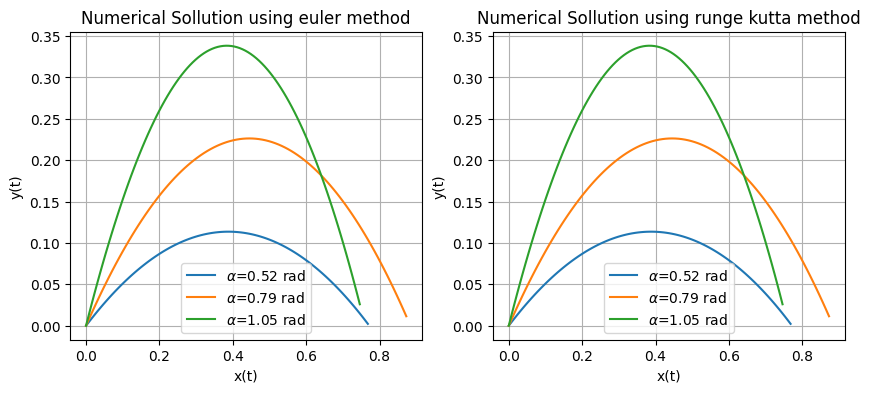

In [55]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

for i,alpha in enumerate(angels):
    t = np.linspace(0,plot_times[i],100)
    v0x = v0*np.cos(alpha) 
    v0y = v0*np.sin(alpha)
    S0 = (x0, y0, v0x, v0y)

    sol_euler = euler_method(dvdt,t,S0) 
    x1, y1 = get_res(sol_euler)

    sol_runge = runge_kutta(dvdt,t,S0) 
    x2, y2 = get_res(sol_runge)

    sol_num = solve_ivp(dvdt,t_span=(0,max(t)),y0=S0,t_eval=t) 
    x3, y3 = sol_num.y[0], sol_num.y[1]

    x_ana, y_ana = analytical_solution(t, v0x, v0y)
    axs[0].plot(x1, y1, '-', label=fr"$\alpha$={alpha:.2f} rad") 
    axs[1].plot(x2, y2, '-', label=fr"$\alpha$={alpha:.2f} rad") 

axs[0].set_xlabel("x(t)") 
axs[0].set_ylabel("y(t)") 
axs[0].set_title(fr"Numerical Sollution using euler method") 
axs[0].grid(True) 
axs[0].legend() 

axs[1].set_xlabel("x(t)") 
axs[1].set_ylabel("y(t)") 
axs[1].set_title(fr"Numerical Sollution using runge kutta method") 
axs[1].grid(True) 
axs[1].legend() 


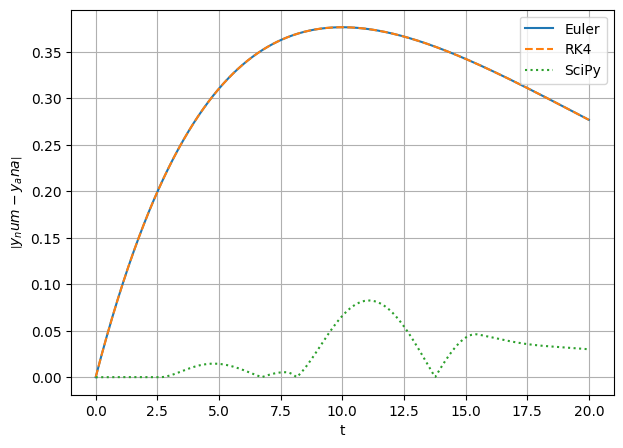

In [56]:
t = np.linspace(0,20,1000)

fig, ax = plt.subplots(1,1,figsize=(7,5))

v0x, v0y = v0*np.cos(np.pi/4), v0*np.sin(np.pi/4)
S0 = (x0, y0, v0x, v0y)

# Euler
sol_euler = euler_method(dvdt, t, S0)
x1, y1 = sol_euler[:,0], sol_euler[:,1]

# RK4
sol_rk4 = runge_kutta(dvdt, t, S0)
x2, y2 = sol_rk4[:,0], sol_rk4[:,1]

# SciPy
sol_scipy = solve_ivp(dvdt, t_span=(0,max(t)), y0=S0, t_eval=t)
x3, y3 = sol_scipy.y[0], sol_scipy.y[1]

# Analytical
x_ana, y_ana = analytical_solution(t, v0x, v0y)

# Simple error: absolute difference in y(t)
err_euler = np.abs(y1 - y_ana)
err_rk4   = np.abs(y2 - y_ana)
err_scipy = np.abs(y3 - y_ana)

ax.plot(t, err_euler, label=f"Euler")
ax.plot(t, err_rk4, '--', label=f"RK4")
ax.plot(t, err_scipy, ':', label=f"SciPy")
ax.set_xlabel("t")
ax.set_ylabel(r"$\left| y_num - y_ana \right|$")
ax.legend()
ax.grid(True)